# ACTER Dataset ver 1.4

## I. Data structures

```
ACTER
│   README.md
│   sources.txt
│
└───en
│   └───corp
│   |   └───annotations
│   |   |   |   corp_en_terms.ann
│   |   |   |   corp_en_terms_nes.ann
│   |   | 
│   |   └───texts
|   |       └───annotated
│   |       |   corp_en_01.txt
│   |       |   corp_en_02.txt
│   |       |   ...
│   |       |
|   |       └───unannotated
│   |           |   corp_en_03.txt
│   |           |   ...
|   |
│   └───equi (equivalent to "corp")
|   |
│   └───htfl (equivalent to "corp")
|   |
│   └───wind (equivalent to "corp")
|
└───fr (equivalent to "en")
└───nl (equivalent to "en")
```

## II. Explore data

1. __Domains__: __corp__ (corruption), __equi__ (equitation/dressage), __htfl__ (heart failure), __wind__ (wind energy).

2. __Languages__: __en__ (English), __fr__ (French), __nl__ (Dutch).

3. __Term Types/ Annotations__

|       Terms      |       Meaning       | 
|       :---:      |       :---:         | 
|       Spec       |    Specific Terms   |
|       Com        |    Common Terms     |
|       OOD        | Out-of-Domain Terms |
|       NE(s)      |    Named Entities   |

In [1]:
import os
from glob import glob
import pandas as pd

In [7]:
def extract_train_test(PATH, EXT):
    """
    @param   PATH (str): data path.
    @param   EXT (str): data extension.
    @return  data (DataFrame): term dataframe.
    """
    all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
    
    li = []
    for file in all_files:
        df = pd.read_csv(file, sep='^([^\t]*)\t', engine='python', header=None).drop(0, axis=1).rename(columns={1: "Text", 2: "Labels"})
        df['Domain'] = str(file.split('/')[-1].split('_')[0])
        li.append(df)
    data = pd.concat(li, axis=0, ignore_index=True)
    return data

def statistics(df, title):
    """
    @param   df (DataFrame): data.
    """
    count = df.groupby(['Labels', 'Domain']).size().unstack(fill_value=0)
    print(count.to_markdown())
    print(count[['corp','equi','htfl','wind']].plot(kind='bar', figsize=(10,5), legend=True, grid=True,
                                                    title = title))

In [3]:
PATH = '/Users/hanhtran/Documents/terminology-extraction/ACTER/'

# Non-NEs
en_ann = extract_train_test(PATH, "*en_terms.ann")
fr_ann = extract_train_test(PATH, "*fr_terms.ann")
nl_ann = extract_train_test(PATH, "*nl_terms.ann")


# NEs
en_nes = extract_train_test(PATH, "*en_terms_nes.ann")
fr_nes = extract_train_test(PATH, "*fr_terms_nes.ann")
nl_nes = extract_train_test(PATH, "*nl_terms_nes.ann")

| Labels        |   corp |   equi |   htfl |   wind |
|:--------------|-------:|-------:|-------:|-------:|
| Common_Term   |    642 |    309 |    319 |    296 |
| Named_Entity  |    247 |    420 |    226 |    443 |
| OOD_Term      |      6 |     69 |    157 |     14 |
| Specific_Term |    278 |    777 |   1883 |    781 |
AxesSubplot(0.125,0.125;0.775x0.755)


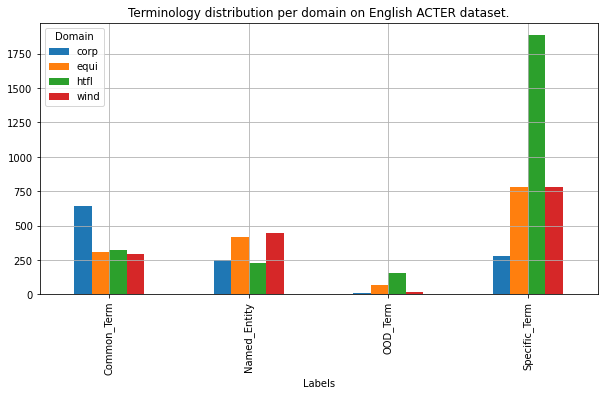

In [8]:
statistics(en_nes, 'Terminology distribution per domain on English ACTER dataset.')

| Labels        |   corp |   equi |   htfl |   wind |
|:--------------|-------:|-------:|-------:|-------:|
| Common_Term   |    675 |    234 |    487 |    308 |
| Named_Entity  |    229 |    220 |    146 |    195 |
| OOD_Term      |      5 |     26 |     57 |     21 |
| Specific_Term |    298 |    701 |   1684 |    444 |
AxesSubplot(0.125,0.125;0.775x0.755)


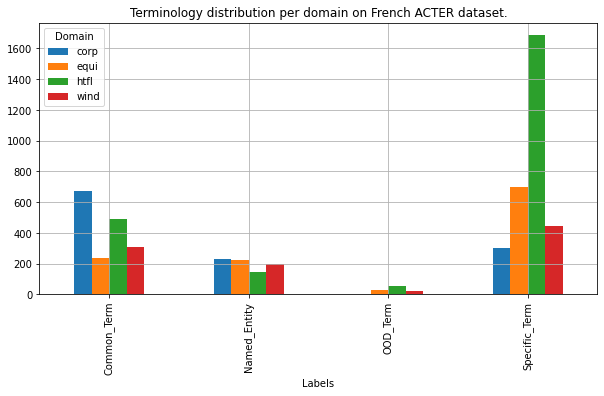

In [9]:
statistics(fr_nes,'Terminology distribution per domain on French ACTER dataset.')

| Labels        |   corp |   equi |   htfl |   wind |
|:--------------|-------:|-------:|-------:|-------:|
| Common_Term   |    730 |    330 |    449 |    342 |
| Named_Entity  |    249 |    151 |    180 |    305 |
| OOD_Term      |      6 |     41 |     66 |     21 |
| Specific_Term |    310 |   1022 |   1559 |    577 |
AxesSubplot(0.125,0.125;0.775x0.755)


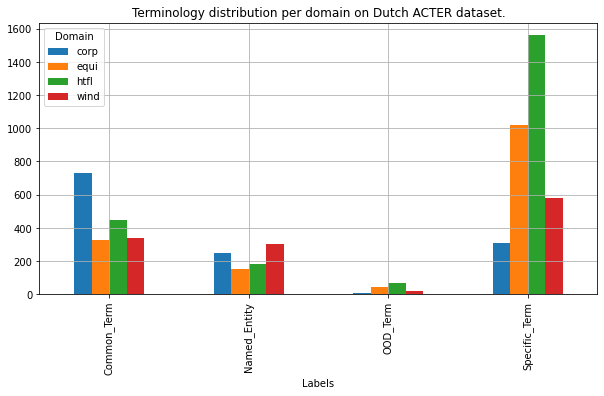

In [10]:
statistics(nl_nes, 'Terminology distribution per domain on Dutch ACTER dataset.')

## References
- Data Resource: download at [Link](https://github.com/AylaRT/ACTER).
- Paper: [Shared Task on Automatic Term Extraction Using the
Annotated Corpora for Term Extraction Research (ACTER) Dataset](https://www.aclweb.org/anthology/2020.computerm-1.12.pdf)